<a href="https://colab.research.google.com/github/Ivelina0/Dissertation_code/blob/main/Chapter_2_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fig 1: Jensen's inequality

(0.0, 4.0)

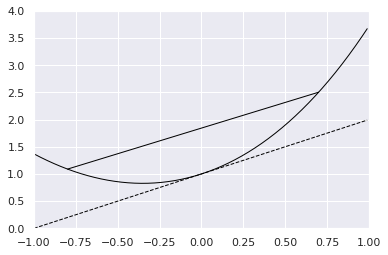

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
    
# initial values of chord
x_1 = -0.8
x_2 = 0.7

y_1 = np.exp(x_1) + (x_1)**2
y_2 = np.exp(x_2) + (x_2)**2

# gradient of a simple linear equation
m = (y_2 - y_1)/(x_2 - x_1)

#################### Graph Set Up ####################

# Return evenly spaced values within [-1,1] with 0.01 step.
x = np.arange(-1.0, 1.0, 0.01)
y1 = np.exp(x) + x**2
y2 = x + 1

# Return evenly spaced values within [-0.8,1] with 0.75 step.
x2 = np.arange(-0.8, 1.0, 0.75)
y = m*x2 - m*x_1 + y_1

fig, ax = plt.subplots()

# Plot data on the (implicit) axes.
line1 = plt.plot(x, y1, label='f(x)', color='black',linewidth=1)  
line2 = plt.plot(x, y2, '--', label='tangent',color='black',linewidth=1)  
line3 = plt.plot(x2, y, label='chord', color='black', linewidth=1)

plt.xlim((-1,1)) # limit x axis
plt.ylim((0,4)) # limit y axis

#fig.savefig('Convex Function Example.png')

# Fig 2: cos(x)

(-1.0, 1.0)

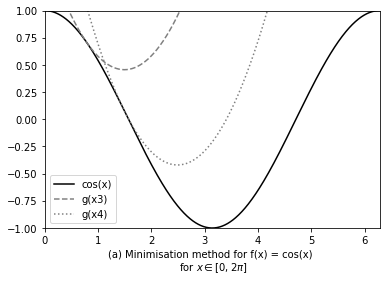

In [ ]:
# inital guess
x_n = 0.1

# list of x_n values as they iterate
x_n_update = [] 
# list of update of cos(x) function with each iterate
cos_x_n_update = [] 

for i in range(10):
    
    # Calculate values of x_n and cos(x)
    x_n = x_n + np.sin(x_n)
    cos_x_n = np.cos(x_n)
    
    # append values to empty list
    x_n_update.append(x_n)    
    cos_x_n_update.append(cos_x_n)

## --- Plotting for a few values of x_n ----

# X axis set up
x = np.arange(0, 4*np.pi, 0.01)

# The original function we want to minimise 
f_x = np.cos(x)

# Take two iterations of the MM approach above
# and plug them into the surrogate function
x_3 = x_n_update[2]
x_4 = x_n_update[3]
    
# two surrogate functions  
g_x3 = np.cos(x_3) - np.sin(x_3)*(x - x_3) + (1/2)*(x - x_3)**2

g_x4 = np.cos(x_4) - np.sin(x_4)*(x - x_4) + (1/2)*(x - x_4)**2

# Create a figure and an axes.
fig1, ax = plt.subplots()  

# Plot the f(x) function
line1, = ax.plot(x, f_x, label='cos(x)', color='black') 
# Plot third iteration
line2, = ax.plot(x, g_x3, '--', label='g(x3)', color= 'grey')  
# Plot fourth iteration
line3, = ax.plot(x, g_x4, ':', label='g(x4)', color='grey')  

ax.set_xlabel('x ')  # Add an x-label to the axes.
# ax.set_ylabel('y label')  # Add a y-label to the axes.
# ax.set_title("Cos(x) Plot")  # Add a title.

ax.legend()  # Add a legend.
ax.set_xlabel('(a) Minimisation method for f(x) = cos(x) \n for $x \in [0, 2\pi]$')

plt.xlim((0,np.pi*2)) # limit x axis
plt.ylim((-1,1)) # limit y axis

#fig1.savefig('Cosx.png')

# Fig 3: Quadratic function

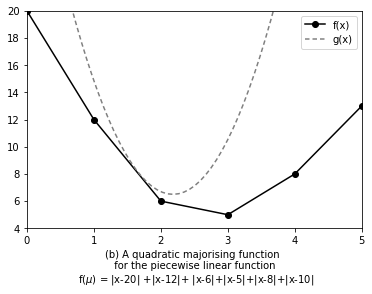

In [ ]:
x1 = np.arange(0,8)
y1 = np.array([20, 12, 6, 5, 8, 13, 15, 20])

x2 = np.linspace(0,8,100)
y2 = 6*x2**2 - 30*x2 + 6*2.5**2 + 6

fig2, ax = plt.subplots()

# f(x)
line1, = ax.plot(x1, y1,'o-', label='f(x)',color='black')

# Surrogate g(x)
line2, = ax.plot(x2-0.32, y2+0.5,dashes=[3, 2], label='g(x)',color='grey')
ax.set_xlabel("(b) A quadratic majorising function \n for the piecewise linear function \n f($\mu$) = |x-20| +|x-12|+ |x-6|+|x-5|+|x-8|+|x-10|")


plt.xlim((0,5)) # limit x axis
plt.ylim((4,20)) # limit y axis

ax.legend()

#fig2.savefig('Simple Example 1.png')

# Finding the sample median 

In [25]:
# Sample list
x1 = np.array([1,3,4,8,10,11,15])

# The actual median
med = np.median(x1)

# Initial guess
theta_update = 6

# Count iterations 
b = 0

# Empty list 
theta_update_list = []

# for loop that finds the median of the sample
for i in range(9):
    
    # weights = 1/np.absolute(x1-theta)
    
    theta_update = (np.dot((1/np.absolute(x1-theta_update))
    ,x1))/sum((1/np.absolute(x1-theta_update)))
    
    theta_update_list.append(theta_update)
    
    f_x = sum(np.absolute(x1-theta_update))
                
    b = i
    
    print("After {} iteration: theta_k+1 = {} , and f(theta) = {}. The real median is {}".format(b, np.round(theta_update, 4), np.round(f_x,4), med))

After 0 iteration: theta_k+1 = 6.4775 , and f(theta) = 29.5225. The real median is 8.0
After 1 iteration: theta_k+1 = 6.9419 , and f(theta) = 29.0581. The real median is 8.0
After 2 iteration: theta_k+1 = 7.3578 , and f(theta) = 28.6422. The real median is 8.0
After 3 iteration: theta_k+1 = 7.6883 , and f(theta) = 28.3117. The real median is 8.0
After 4 iteration: theta_k+1 = 7.9005 , and f(theta) = 28.0995. The real median is 8.0
After 5 iteration: theta_k+1 = 7.9867 , and f(theta) = 28.0133. The real median is 8.0
After 6 iteration: theta_k+1 = 7.9997 , and f(theta) = 28.0003. The real median is 8.0
After 7 iteration: theta_k+1 = 8.0 , and f(theta) = 28.0. The real median is 8.0
After 8 iteration: theta_k+1 = 8.0 , and f(theta) = 28.0. The real median is 8.0


# OLS and LAD examples & & Fig 4 and 5

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
import pandas as pd
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

## Data Cleaning

first_time_buyers = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/First-Time-Buyer-Former-Owner-Occupied-2020-10.csv')

# Limiting the data to only the region name and 1st time house buyers 
first_time_buyers_2 = first_time_buyers[['Date','Region_Name','First_Time_Buyer_Average_Price']]

# Dropping all values with dates greater than the 1st Jan 2020 
# and less than or equal to the 1st May 2019

first_time_buyers_3 = first_time_buyers_2[ first_time_buyers_2['Date'] < '2020-01-01'].dropna()

first_time_buyers_4 = first_time_buyers_3[ first_time_buyers_3['Date'] >='2019-05-01'].dropna()

# Check the dates are correct 
first_time_buyers_4.groupby(['Date']).mean()

# Group the home buyers by region and find the mean of the house price
## for 2020 year. Getting rid of dates

first_time_buyers_5 = first_time_buyers_4.groupby(['Region_Name']).mean().reset_index()

# Assign a new the column names: from Region_Name to 
# Region, and set index Region for ease when joining with other data
first_time_buyers_5.columns = ['Region', 'First_Time_Buyer_Average_Price']

first_time_buyers_5= first_time_buyers_5.set_index('Region')

first_time_buyers_5.head()


,First_Time_Buyer_Average_Price
Region,
Aberdeenshire,147565.603738
Adur,267596.968250
Allerdale,132714.469700
Amber Valley,153964.930512
Angus,120405.232300


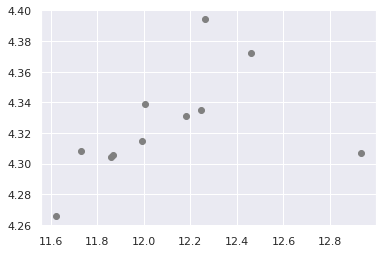

In [5]:
# Adding unemployment data
## ------------------------

unempl = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Employment_June_to_August_2019.csv')

unempl.columns 
# ['Region', 'Employment_16 _to_64_years',
# 'Unemployment_16_years_and_over', 
# 'Inactivity rate_16_to_64_years']

unempl = unempl.set_index('Region')

## Merge 2 datasets

df_both = pd.merge(first_time_buyers_5, unempl, how='inner', on=['Region'])

df_both.columns
## Index(['First_Time_Buyer_Average_Price', 'Region','Employment_16 _to_64_years', 'Unemployment_16_years_and_over','Inactivity rate_16_to_64_years'], dtype='object')
    
# Define arrays for plotting functions
## ---------------------------------------

frist_time_avr_price_array = df_both['First_Time_Buyer_Average_Price'].to_numpy()

employ_array = df_both['Employment_16 _to_64_years'].to_numpy()

unemploy_array = df_both['Unemployment_16_years_and_over'].to_numpy()

# plot a simple scatter to get a feel for the data
plt.scatter(np.log(frist_time_avr_price_array), np.log(employ_array),color='gray');


In [6]:
# Preparing data for regression
## ----------------------------------

x_vals = np.log(employ_array)
y_vals = np.log(frist_time_avr_price_array)

x_vals = np.reshape(x_vals, (-1,1))
y_vals = np.reshape(y_vals, (-1,1))

For i = 1, beta is [[-1.5041]
 [ 2.1147]], the least squares are 220.318
For i = 2, beta is [[-1.0983]
 [ 2.2085]], the least squares are 147.8634
For i = 3, beta is [[-0.7663]
 [ 2.2853]], the least squares are 99.361
For i = 4, beta is [[-0.4947]
 [ 2.3481]], the least squares are 66.8927
For i = 5, beta is [[-0.2725]
 [ 2.3995]], the least squares are 45.1579
For i = 6, beta is [[-0.0906]
 [ 2.4415]], the least squares are 30.6082
For i = 7, beta is [[0.0581]
 [2.476 ]], the least squares are 20.8684
For i = 8, beta is [[0.1798]
 [2.5041]], the least squares are 14.3484
For i = 9, beta is [[0.2794]
 [2.5271]], the least squares are 9.9838
For i = 10, beta is [[0.3608]
 [2.546 ]], the least squares are 7.0621
For i = 11, beta is [[0.4275]
 [2.5614]], the least squares are 5.1062
For i = 12, beta is [[0.482]
 [2.574]], the least squares are 3.797
For i = 13, beta is [[0.5266]
 [2.5844]], the least squares are 2.9205
For i = 14, beta is [[0.5631]
 [2.5928]], the least squares are 2.333

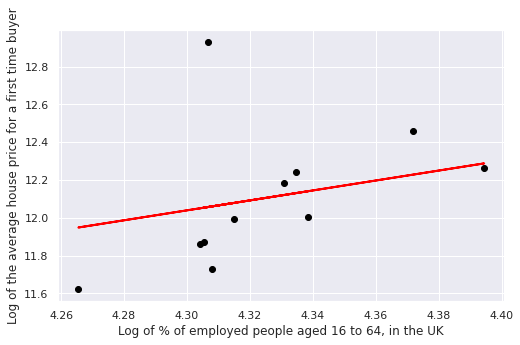

In [29]:
##########################################################
## OLS Regression Example: Fig. 2.3 (a)
##########################################################

# add ones to 1st column of X
X = np.append(np.ones((x_vals.shape[0],1)), x_vals,axis = 1)
X_T = X.T

# p-value is 1

norm = np.linalg.norm(X_T, ord=1, axis=1).reshape(-1,1) 
# row wise norm

alpha = np.absolute(X_T)/norm

A = np.sum(np.square(X_T)/alpha, axis=1)

A = A.reshape(2,1) ## bottom vector in calc

# A is A for all 

# initial values of parameters
beta = np.array([[-2],[2]])

#iterations counter 
b = 0

# no. of iterations
n=50

for i in range(0,n):
  
    # prediction values 
    pred = np.matmul(X_T.T, beta)  
    
    # find residuals
    res = np.matmul(X_T, (y_vals - pred))
    
    # the parameter update
    beta = res/A + beta

    # calculating the least squares we want to minimise
    least_squares =  np.sum((y_vals -  np.matmul(X_T.T, beta))**2 ) 
    
    b = i+1
    
    print('For i = {}, beta is {}, the least squares are {}'.format(b,np.round(beta,4), np.round(least_squares,4)))

# fitted values using the parameters above 
pred = beta[1]*x_vals + beta[0]

# Plot the chart 
## -----------------------------
fig = plt.figure(figsize=(8,5))

plt.scatter(x_vals, y_vals, color='black', marker = 'o')
plt.plot(x_vals, pred,  color='red', linewidth = 2)

plt.xlabel("Log of % of employed people aged 16 to 64, in the UK")
plt.ylabel("Log of the average house price for a first time buyer")

# download image
fig.savefig('LAD_with_London_outlier.png', dpi=300)

# evaluation 
RSS1 = sum( (y_vals - pred)**2 )

Iteration 1 gives beta [[-8.9471]
 [ 4.8658]], the least absolute deviation is 2.3388 
Iteration 2 gives beta [[-14.3137]
 [  6.0985]], the least absolute deviation is 2.1246 
Iteration 3 gives beta [[-16.9842]
 [  6.7142]], the least absolute deviation is 2.0619 
Iteration 4 gives beta [[-18.5728]
 [  7.0817]], the least absolute deviation is 2.0376 
Iteration 5 gives beta [[-19.2833]
 [  7.246 ]], the least absolute deviation is 2.0267 
Iteration 6 gives beta [[-19.3969]
 [  7.2724]], the least absolute deviation is 2.0258 
Iteration 7 gives beta [[-19.4452]
 [  7.2838]], the least absolute deviation is 2.0256 
Iteration 8 gives beta [[-19.4967]
 [  7.2959]], the least absolute deviation is 2.0255 
Iteration 9 gives beta [[-19.5475]
 [  7.3078]], the least absolute deviation is 2.0254 
Iteration 10 gives beta [[-19.597 ]
 [  7.3194]], the least absolute deviation is 2.0253 
Iteration 11 gives beta [[-19.6451]
 [  7.3307]], the least absolute deviation is 2.0252 
Iteration 12 gives be

Text(0, 0.5, 'Log of the average house price for a first time buyer')

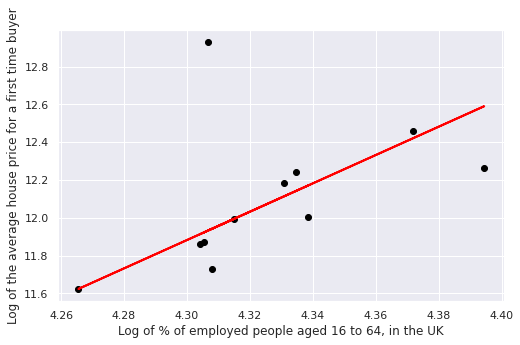

In [30]:

##########################################################
## LAD Regression Example:  Fig. 2.3 (b)
##########################################################

# add ones in the column of X 
X = np.append(np.ones((x_vals.shape[0],1)), x_vals,axis = 1)

# initial guess 
beta_update = np.zeros(X.shape[1])

# create an empty matrix to be filled by the weights matrix
M = np.zeros((11,11))

# counter 
b=0

# set the no. of iterations
n= 50

for i in range(n):
    
    # create diagonal matrix
    W = 1/np.absolute(y_vals.T - np.matmul(beta_update.T,X.T))    
    np.fill_diagonal(M, W)
    
    # inversing the matrix
    inv = np.linalg.inv(np.matmul(np.matmul(X.T,M),X))
    
    # calculating the theta update    
    beta_update = np.matmul(np.matmul( np.matmul(inv,X.T),M) , y_vals)

    # calculating the least absolute deviation we want to minimise
    least_abs_dev=  np.sum(np.absolute((y_vals -  np.matmul(X_T.T, beta_update))))
    
    b = i+1
    
    print("Iteration {} gives beta {}, the least absolute deviation is {} ".format(b, np.round(beta_update,4), np.round(least_abs_dev,4)))
    
## fitted values using the parameters above 
pred = beta_update[1]*x_vals + beta_update[0]

## Plot the graph 
fig = plt.figure(figsize=(8,5))

plt.scatter(x_vals, y_vals, color='black', marker = 'o')
plt.plot(x_vals, pred,  color='red', linewidth = 2)

plt.xlabel("Log of % of employed people aged 16 to 64, in the UK")
plt.ylabel("Log of the average house price for a first time buyer")

# save image
#fig.savefig('LAD_with_London_outlier.png', dpi=300)

# Fig 6: GMM Example 1 

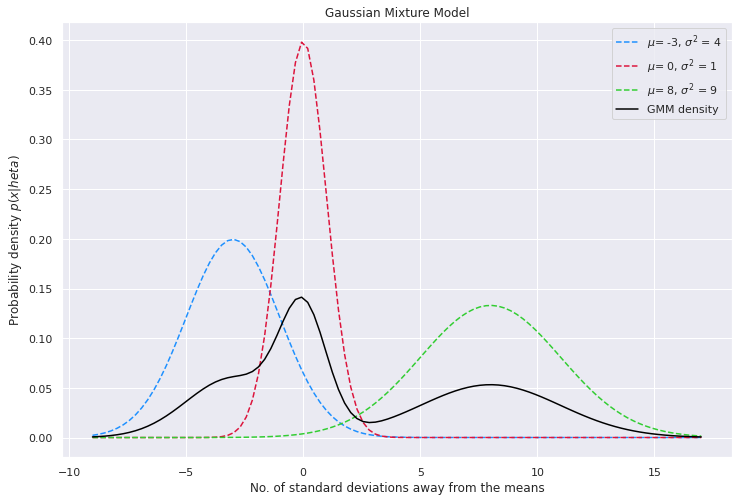

In [13]:
import scipy.stats as stats

# Define the 3 means in the first array and the 3 standard deviations in the second
param = np.array([[-3,0,8], [2,1,3]])

# Create the x-axis, 3 s.t. away from the first mean (-3), and 3 s.t. from the last mean (8)
x = np.linspace(param[0][0] - 3*param[1][0], param[0][2] + 3*param[1][2], 100)

# Use scipy's stats function to create the gaussian distributions
y = 0.3*stats.norm.pdf(x, param[0][0], param[1][0]) + 0.3*stats.norm.pdf(x, param[0][1], param[1][1]) + 0.4*stats.norm.pdf(x, param[0][2], param[1][2])

#Set colours for the normal distributions
col = ["dodgerblue", "crimson", "limegreen"]

# Plot the mixtures
fig = plt.figure( figsize = (12,8))

for i in range(3):

  plt.plot(x, stats.norm.pdf(x, param[0][i], param[1][i]), 
           color=col[i], linestyle='dashed', 
           label = "$ \mu $= {}, $\sigma^2 $ = {}".format(param[0][i], np.square(param[1][i])))

  plt.legend()

plt.plot(x, y, color="black", label = "GMM density")

plt.ylabel("Probability density $p(x| \theta)$")
plt.xlabel("No. of standard deviations away from the means")
plt.legend()
plt.title("Gaussian Mixture Model");

fig.savefig( "/content/gdrive/My Drive/Colab Notebooks/GMM.png" ,dpi=200,transparent=True)

# Fig 7: GMM Example 2

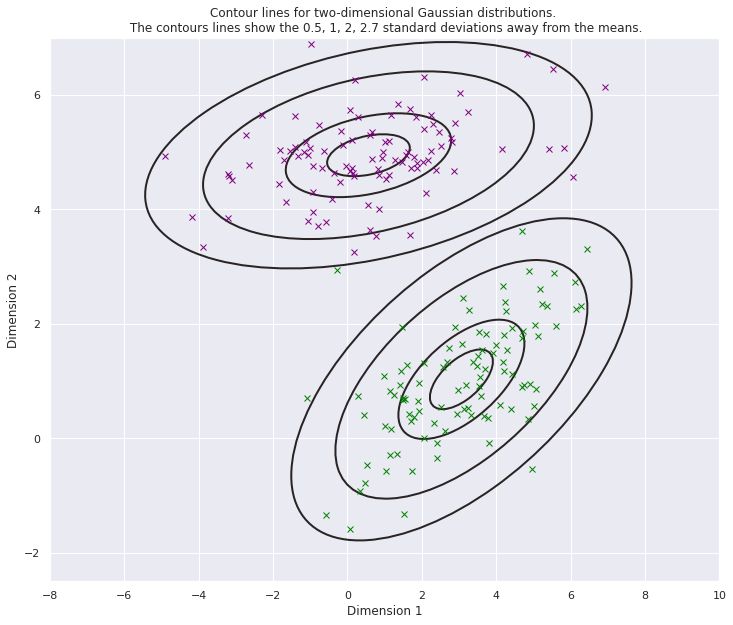

In [20]:
## Functions from 
# https://github.com/joferkington/oost_paper_code/blob/master/error_ellipse.py

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def plot_point_cov(points, nstd=2, ax=None, **kwargs):
    """
    Plots an `nstd` sigma ellipse based on the mean and covariance of a point
    "cloud" (points, an Nx2 array).
    Parameters
    ----------
        points : An Nx2 array of the data points.
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.
    Returns
    -------
        A matplotlib ellipse artist
    """
    pos = points.mean(axis=0)
    cov = np.cov(points, rowvar=False)
    
    return plot_cov_ellipse(cov, pos, nstd, ax, **kwargs)

def plot_cov_ellipse(cov, pos, nstd=2, ax=None, **kwargs):
    """
    Plots an `nstd` sigma error ellipse based on the specified covariance
    matrix (`cov`). Additional keyword arguments are passed on to the 
    ellipse patch artist.
    Parameters
    ----------
        cov : The 2x2 covariance matrix to base the ellipse on
        pos : The location of the center of the ellipse. Expects a 2-element
            sequence of [x0, y0].
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.
    Returns
    -------
        A matplotlib ellipse artist
    """
    def eigsorted(cov):
        
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta,
    edgecolor='#292323' ,lw=2, facecolor='none' , **kwargs)

    ax.add_artist(ellip)
    return ellip


########################################################
## Plotting the image 
########################################################

points = np.random.multivariate_normal(mean=(1,5), cov=[[7, 1],[1, 0.5]], size=100)
x, y = points.T

points_2 = np.random.multivariate_normal(mean=(3,1), cov=[[3, 1],[1, 1.5]], size=100)
x2, y2 = points_2.T

# fig = plt.gcf()

fig = plt.figure(figsize=(12,10))

# Plot the raw points...
ax = plt.plot(x, y, 'x',color = 'purple')

ax = plt.plot(x2, y2, 'x',color = 'green')

# Plot a transparent 3 standard deviation covariance ellipse
ax = plot_point_cov(points, nstd=2.7)
ax = plot_point_cov(points, nstd=2.0)
ax = plot_point_cov(points, nstd=1.0)
ax = plot_point_cov(points, nstd=0.5)


ax = plot_point_cov(points_2, nstd=2.7)
ax = plot_point_cov(points_2, nstd=2.0)
ax = plot_point_cov(points_2, nstd=1.0)
ax = plot_point_cov(points_2, nstd=0.5)

plt.xlim(-8,10)
plt.ylim(-2.5,7)

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

plt.title("Contour lines for two-dimensional Gaussian distributions. \n The contours lines show the 0.5, 1, 2, 2.7 standard deviations away from the means.")

fig.savefig('Normal_Multivariate_dist_2D.png', dpi=200, transparent=True)